In [56]:
import os
import pandas as pd
import numpy as np
import urllib
from gekko import GEKKO
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
path = r'C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\normals\normcomp'
os.chdir(path)


path = r'C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\stdev'
os.chdir(path)

csv = r'C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\stdev\test.csv'
coagcsv = r'C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\stdev\CoAg_test.csv'
urllib.request.urlretrieve('http://data.rcc-acis.org/StnData?sid=050109&sdate=1992-07-01&edate=2018-12-31&elems=avgt&output=csv', filename=csv)
df = pd.read_csv(csv)
df = df.reset_index()
df.columns.values[0] = 'date'
df.columns.values[1] = 'avgt'
df['date'] = pd.to_datetime(df.date)
df['julian'] = df.date.dt.strftime('%j')
df = df.replace('M', np.nan, regex=True)
df.avgt = df.avgt.astype(float)
#df = df.where(df.julian != 366)
df

,date,avgt,julian
0,1992-07-01,NaN,183
1,1992-07-02,NaN,184
2,1992-07-03,NaN,185
3,1992-07-04,NaN,186
4,1992-07-05,NaN,187
5,1992-07-06,NaN,188
6,1992-07-07,NaN,189
7,1992-07-08,NaN,190
8,1992-07-09,NaN,191
9,1992-07-10,NaN,192


In [58]:
normal = df.groupby(['julian']).mean().reset_index()
normal

,julian,avgt
0,001,24.080000
1,002,25.000000
2,003,26.940000
3,004,25.826923
4,005,23.640000
5,006,24.211538
6,007,24.326923
7,008,28.096154
8,009,30.769231
9,010,29.557692


In [59]:
normal_residual = df.merge(normal,'outer',left_on='julian',right_on='julian',suffixes=('_observed','_normal'))
normal_residual

,date,avgt_observed,julian,avgt_normal
0,1992-07-01,NaN,183,73.557692
1,1993-07-02,75.5,183,73.557692
2,1994-07-02,78.5,183,73.557692
3,1995-07-02,59.5,183,73.557692
4,1996-07-01,68.5,183,73.557692
5,1997-07-02,64.5,183,73.557692
6,1998-07-02,75.0,183,73.557692
7,1999-07-02,71.5,183,73.557692
8,2000-07-01,73.0,183,73.557692
9,2001-07-02,81.0,183,73.557692


In [60]:
normal_residual['residual'] = normal_residual['avgt_normal'] - normal_residual['avgt_observed']
normal_residual['date'] = pd.to_datetime(normal_residual.date)
normal_residual['year'] = normal_residual.date.dt.year


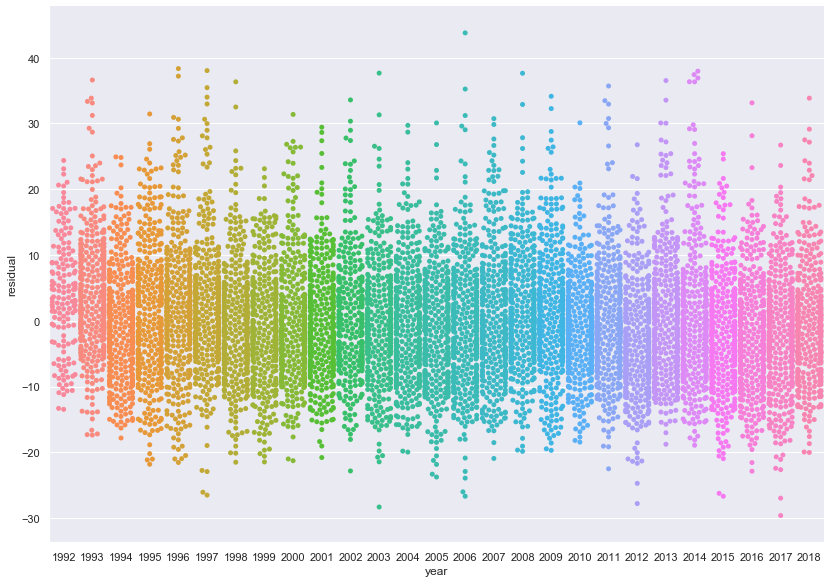

In [64]:
ax = sns.catplot(x='year',y='residual',data=normal_residual,kind='swarm',height=8.27,aspect=11.7/8.27)
plt.savefig(path + r'\normal_residual2.png')
plt.show()

In [12]:
x = df['julian']
y = df['avgt']

In [ ]:
m = GEKKO()
m.x = m.Param()